<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/03_multi_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

필요 라이브러리 설치 (Google Colab에서 실행 시 필요)

In [1]:
!pip install yfinance numpy pandas matplotlib seaborn scikit-learn


라이브러리 불러오기

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)

In [3]:
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")

[*********************100%***********************]  1 of 1 completed


데이터프레임 변환

In [4]:
df = df.reset_index()

특징(Feature) 생성: 날짜를 숫자로 변환

In [5]:
df["Day"] = np.arange(len(df))

추가 Feature 생성: 이동 평균(Moving Average)

In [6]:
df["MA_5"] = df["Close"].rolling(window=5).mean()  # 5일 이동 평균
df["MA_10"] = df["Close"].rolling(window=10).mean()  # 10일 이동 평균
df["MA_20"] = df["Close"].rolling(window=20).mean()  # 20일 이동 평균
df["MA_50"] = df["Close"].rolling(window=50).mean()  # 50일 이동 평균
df["MA_100"] = df["Close"].rolling(window=100).mean()  # 100일 이동 평균

결측치 처리 (이동 평균 계산으로 인한 NaN 값 제거)

In [7]:
df = df.dropna()

독립 변수(X)와 종속 변수(Y) 정의

In [8]:
features = ["Day","MA_5", "MA_10", "MA_20", "MA_50", "MA_100"]  # 다중 선형 회귀의 독립 변수들
X = df[features]
y = df["Close"]  # 종속 변수: TSLA 종가

데이터 분할 (80% 학습, 20% 테스트)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

데이터 정규화 (선택 사항)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

다중 선형 회귀 모델 학습

In [11]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

예측 수행

In [12]:
y_pred = model.predict(X_test_scaled)

성능 평가

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📌 Mean Squared Error (MSE): {mse:.4f}")
print(f"📌 R-squared (R²): {r2:.4f}")


📌 Mean Squared Error (MSE): 46.7332
📌 R-squared (R²): 0.8634


결과 시각화

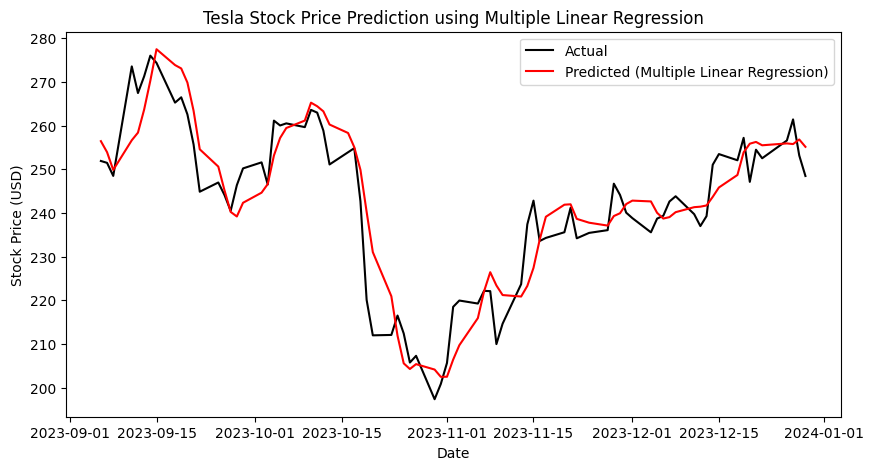

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(df["Date"].iloc[len(X_train):], y_test, label="Actual", color="black")
plt.plot(df["Date"].iloc[len(X_train):], y_pred, label="Predicted (Multiple Linear Regression)", color="red")
plt.title("Tesla Stock Price Prediction using Multiple Linear Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()